# Restaurant

## Centroid data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data
borough = pd.read_csv('data/Local_Authority_Districts_(December_2021)_GB_BFE.csv',index_col=0)

In [3]:
# Select London borough
london_borough = borough.loc[borough["LAD21CD"].str.startswith('E09', na=False)]

In [4]:
# Calculate each borough radius
london_borough['radius'] = np.sqrt(london_borough['SHAPE_Area']/3.14)

<ipython-input-4-1bd1d5b8cdd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_borough['radius'] = np.sqrt(london_borough['SHAPE_Area']/3.14)


In [5]:
london_borough

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Length,SHAPE_Area,radius
OBJECTID,,,,,,,,,,,
277,E09000001,City of London,,532382,181358,-0.093510,51.515640,{BD79A89E-69E3-440B-9C72-AC6D20F66E14},9644.056316,3.146884e+06,1001.095613
278,E09000002,Barking and Dagenham,,547757,185111,0.129479,51.545551,{BB917FAF-CA10-46CC-BDBF-078B0DE4F137},37093.054979,3.778184e+07,3468.779710
279,E09000003,Barnet,,523473,191752,-0.218190,51.611069,{E9E51B0D-01F3-45F8-9B36-085C3994E807},50937.778177,8.676670e+07,5256.682227
280,E09000004,Bexley,,549202,175434,0.146212,51.458221,{6A5DF494-5A1B-49B6-83D2-3049DC043064},43462.103323,6.431572e+07,4525.783173
281,E09000005,Brent,,519615,186465,-0.275680,51.564381,{51B06841-6B14-404A-9EBE-2C1A27EC9CD5},38441.462110,4.323636e+07,3710.733463
282,E09000006,Bromley,,542036,165707,0.039246,51.372662,{6AD8C7C7-049E-42C6-8A20-ACB8395F49DD},76225.719655,1.501325e+08,6914.686728
283,E09000007,Camden,,527491,184283,-0.162910,51.543049,{66058A02-3F07-4FA0-A408-B2C4F7507FF5},26245.739182,2.177858e+07,2633.600842
284,E09000008,Croydon,,533922,164744,-0.077610,51.365971,{D4C5CFEF-8566-4836-A3C0-EEA116F2875B},58721.195772,8.648872e+07,5248.254810
285,E09000009,Ealing,,517055,181959,-0.314100,51.524422,{FC4A5BE9-CA2F-4698-8C4A-9F90715EB259},47461.417484,5.554207e+07,4205.776622


## Restaurant data

In [6]:
# Import the moudles
import requests
from yelpapi import YelpAPI

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyproj import CRS

In [7]:
# Define the API key, define the endpoint, and define the Header
api_key = '60Qf9vdqF5gZykzoJ5DL5GOpResm3xkZWYcxQMYV4NZarz9ULs2wSgW7tf_MNYhPgwsx77sZ6HXpGyUUbrFNytjERyUznTccy1L1UIrGhusq6-dI6WxP8_SuHOXEYnYx'
headers = {'Authorization': 'Bearer %s' % api_key}
url = 'https://api.yelp.com/v3/businesses/search'

In [8]:
# list of original categories available on Yelp
categories = ['italian','french','spanish','portuguese','austrian','belgian','bulgarian','czech','georgian','german','hungarian','fondue','polish','scandinavian','african','ethiopian','moroccan','mediterranean','greek','kebab','turkish','arabian','pakistani','mideastern','afghani','australian','russian','ukrainian','chinese','taiwanese','indpak','cambodian','indonesian','laotian','malaysian','singaporean','srilankan','thai','vietnamese','japanese','korean','bangladeshi','burmese','filipino','himalayan','asianfusion','mongolian','newamerican','tradamerican','hawaiian','mexican','argentine','brazilian','caribbean','cuban','latin','peruvian']

In [9]:
# combined general categories
general_cate = [{'Italian':['italian']},
               {'Chinese':['chinese','taiwanese']},
               {'Indian':['indpak']},
               {'Japanese_Korean':['japanese','korean']},
               {'Pakistani':['pakistani']},
               {'Southeast_Asian':['thai', 'vietnamese', 'malaysian', 'indonesian', 'bangladeshi', 'burmese', 'singaporean', 'srilankan', 'laotian']},
               {'Mediterranean':['mediterranean', 'greek', 'turkish', 'kebab']},
               {'French':['french']},
               {'Middle_Eastern':['mideastern','arabian','afghani']},
               {'American':['tradamerican','newamerican']},
               {'European_Other':['spanish', 'portuguese', 'polish', 'german', 'scandinavian', 'belgian', 'austrian', 'hungarian', 'fondue', 'czech', 'bulgarian']},
               {'African':['african','moroccan','ethiopian']},
               {'Latin_American':['mexican','caribbean','latin', 'brazilian', 'argentine', 'peruvian', 'cuban']},
               {'Other':['asianfusion', 'russian', 'australian', 'hawaiian', 'filipino', 'himalayan', 'ukrainian', 'georgian']}
               ]

In [10]:
# create a list of search area parameters
c_x = london_borough.LONG.tolist()
c_y = london_borough.LAT.tolist()
mbg_r = london_borough.radius.tolist()
search_areas = []
for i in range(33):
    search_para = dict(longitude=c_x[i],latitude=c_y[i],radius=int(mbg_r[i]))
    search_areas.append(search_para)

In [11]:
# a series of functions used to retrieve and convert data
def search_area(offset,category,search_range):
    # return the list of businesses of certain category (string) in the specified search area (dictionary)

    params = {'term':'restaurants','locale':'en_GB','limit':50,'offset':offset,'categories':category}
    params.update(search_range)
    req=requests.get(url, params=params, headers=headers)
    #print(req.json())
    if 'businesses' not in req.json():
        return ""
    return req.json()['businesses']

def business_retriever(category,search_range):
    # retrive the json data of a certian cusine category in the specified area and store as a list

    cate_results = []

    # test number of total restaurants in this category
    params = {'term':'restaurants','locale':'en_GB','limit':1,'offset':0,'categories':category}
    params.update(search_range)
    req=requests.get(url, params=params, headers=headers)

    if req.status_code == 200: # proceed only if the status code is 200
        total = req.json()['total']
        if total > 1000:
            print ('There are more than 1000 restaurants under category',category,'. Only the first 1000 will be returned.')
            for offset in range(0,1000,50):
                results = search_area(offset,category,search_range)
                cate_results.extend(results)
        elif total > 50 and total <= 1000:
            for offset in range(0,total,50):
                results = search_area(offset,category,search_range)
                cate_results.extend(results)
        else:
            cate_results.extend(search_area(0,category,search_range))

    else:
        print ('Error in retrieving data.')

    return cate_results

def extractor(categories,search_range):
    # extract useful info from data retrieved and combine restaurants of different categories into one list
    full_restaurants = []
    for category in categories: # loop through all the categories
        results = business_retriever(category,search_range)
        for restaurant in results: # loop through restaurants in each category
            if restaurant['is_closed'] == False: # only keep records that are still open
                rest_out = {}
                rest_out['id'] = restaurant['id']
                rest_out['category'] = category
                rest_out['longitude'] = restaurant['coordinates']['longitude']
                rest_out['latitude'] = restaurant['coordinates']['latitude']
                full_restaurants.append(rest_out)
    return full_restaurants

In [12]:
# loop through the search areas, extract restaurant information and combine them together
rest_list = []
for area in search_areas:
    resta_area = extractor(categories,area)
    rest_list.extend(resta_area)

In [13]:
# transform the list to a dataframe
rest_df = pd.DataFrame(rest_list)
# remove the duplicates
final_df = rest_df.drop_duplicates(subset='id')

In [14]:
# a new column was added to the dataframe and the general category of each entry was assigned
final_df.loc[:,'general_category'] = np.nan
for dicts in general_cate:
    for small_cate in list(dicts.values())[0]:
        final_df.loc[final_df.category == small_cate,['general_category']] = list(dicts.keys())[0]

<ipython-input-14-8a5a9b9b7c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,'general_category'] = np.nan
<ipython-input-14-8a5a9b9b7c58>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[final_df.category == small_cate,['general_category']] = list(dicts.keys())[0]


In [15]:
final_df.to_csv("data/all_restaurants.csv")

### Spatial join

In [43]:
import geopandas as gpd
from pyproj import CRS

In [44]:
# Read data
restaurant = pd.read_csv('data/all_restaurants.csv',index_col=0)

In [45]:
restaurant

,id,category,longitude,latitude,general_category
0,EPyluvGfkNsgiBn6Dgq2Ig,italian,-0.096247,51.515137,Italian
1,ifVVNQ10aBG8a78oYGbE-g,italian,-0.092843,51.522163,Italian
2,HnyTN6fFxOTpig41DQARlg,italian,-0.095005,51.513674,Italian
3,7y-6yaVTFhXTbqIfnbvRQg,italian,-0.090803,51.515540,Italian
4,vsKa-KYWNeGo2rREfXrwow,italian,-0.089911,51.513682,Italian
...,...,...,...,...,...
11307,XpmUazOGy2VekaS7kqlCdw,peruvian,-0.134536,51.517696,Latin_American
11308,byZ5PAOeIHFkhAjuu2DQPg,peruvian,-0.133918,51.517658,Latin_American
11309,BWJdIt17pZ45taYkX2ZWLA,peruvian,-0.131493,51.513670,Latin_American
11313,s0SqigoH7UEvEMlBkGe-Bg,peruvian,-0.126189,51.511807,Latin_American


In [46]:
# Add Geometry and Reproject
gdf_restaurant = gpd.GeoDataFrame(restaurant, 
                 geometry=gpd.points_from_xy(restaurant['longitude'], restaurant['latitude'], crs='epsg:4326'))
gdf_restaurant = gdf_restaurant.to_crs('epsg:27700')

In [47]:
# Check crs
gdf_restaurant.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## London MSOA Geodata

In [48]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [49]:
# Transform crs
london_areas = london_areas.to_crs('EPSG:27700')

In [50]:
# Check crs
london_areas.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

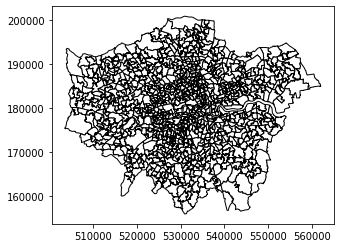

In [51]:
# Plot London MOSA
london_areas.plot(edgecolor='black', facecolor='white', linewidth=1)

In [52]:
# Make sure they're using the same projection reference
gdf_restaurant.crs = london_areas.crs

In [53]:
# Spatial join
sjoined_restaurant = gpd.sjoin(gdf_restaurant, london_areas, how="left", predicate="within")

In [28]:
# Drop NA
#sjoined_restaurant['DataFrame Column'] = sjoined_restaurant['DataFrame Column'].fillna(0)
#sjoined_restaurant.dropna(subset=['MSOA11CD'], inplace=True)

In [54]:
sjoined_restaurant

,id,category,longitude,latitude,general_category,geometry,index_right,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
0,EPyluvGfkNsgiBn6Dgq2Ig,italian,-0.096247,51.515137,Italian,POINT (532196.001 181297.001),0.0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375.0,7187.0,188.0,25.5,4385.0,1.6
1,ifVVNQ10aBG8a78oYGbE-g,italian,-0.092843,51.522163,Italian,POINT (532411.832 182084.475),555.0,E02000576,Islington 023,E09000019,Islington,E12000007,London,9388.0,8787.0,601.0,124.2,4322.0,2.0
2,HnyTN6fFxOTpig41DQARlg,italian,-0.095005,51.513674,Italian,POINT (532286.420 181136.508),0.0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375.0,7187.0,188.0,25.5,4385.0,1.6
3,7y-6yaVTFhXTbqIfnbvRQg,italian,-0.090803,51.515540,Italian,POINT (532572.541 181351.634),0.0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375.0,7187.0,188.0,25.5,4385.0,1.6
4,vsKa-KYWNeGo2rREfXrwow,italian,-0.089911,51.513682,Italian,POINT (532639.823 181146.611),0.0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375.0,7187.0,188.0,25.5,4385.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307,XpmUazOGy2VekaS7kqlCdw,peruvian,-0.134536,51.517696,Latin_American,POINT (529532.115 181513.111),939.0,E02000972,Westminster 013,E09000033,Westminster,E12000007,London,8333.0,7617.0,716.0,64.5,4503.0,1.7
11308,byZ5PAOeIHFkhAjuu2DQPg,peruvian,-0.133918,51.517658,Latin_American,POINT (529575.099 181510.004),185.0,E02000191,Camden 026,E09000007,Camden,E12000007,London,7497.0,5545.0,1952.0,116.8,2868.0,1.9
11309,BWJdIt17pZ45taYkX2ZWLA,peruvian,-0.131493,51.513670,Latin_American,POINT (529754.695 181070.819),939.0,E02000972,Westminster 013,E09000033,Westminster,E12000007,London,8333.0,7617.0,716.0,64.5,4503.0,1.7
11313,s0SqigoH7UEvEMlBkGe-Bg,peruvian,-0.126189,51.511807,Latin_American,POINT (530128.003 180873.007),944.0,E02000977,Westminster 018,E09000033,Westminster,E12000007,London,7490.0,6719.0,771.0,29.8,3895.0,1.7


In [55]:
sjoined_restaurant.to_csv("data/restaurants_final.csv")

In [56]:
# Select column
restaurant_final = pd.read_csv('data/restaurants_final.csv' , usecols = ['id','category','longitude','latitude','general_category','MSOA11CD','MSOA11NM','LAD11CD','LAD11NM'])
restaurant_final

,id,category,longitude,latitude,general_category,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM
0,EPyluvGfkNsgiBn6Dgq2Ig,italian,-0.096247,51.515137,Italian,E02000001,City of London 001,E09000001,City of London
1,ifVVNQ10aBG8a78oYGbE-g,italian,-0.092843,51.522163,Italian,E02000576,Islington 023,E09000019,Islington
2,HnyTN6fFxOTpig41DQARlg,italian,-0.095005,51.513674,Italian,E02000001,City of London 001,E09000001,City of London
3,7y-6yaVTFhXTbqIfnbvRQg,italian,-0.090803,51.515540,Italian,E02000001,City of London 001,E09000001,City of London
4,vsKa-KYWNeGo2rREfXrwow,italian,-0.089911,51.513682,Italian,E02000001,City of London 001,E09000001,City of London
...,...,...,...,...,...,...,...,...,...
7399,XpmUazOGy2VekaS7kqlCdw,peruvian,-0.134536,51.517696,Latin_American,E02000972,Westminster 013,E09000033,Westminster
7400,byZ5PAOeIHFkhAjuu2DQPg,peruvian,-0.133918,51.517658,Latin_American,E02000191,Camden 026,E09000007,Camden
7401,BWJdIt17pZ45taYkX2ZWLA,peruvian,-0.131493,51.513670,Latin_American,E02000972,Westminster 013,E09000033,Westminster
7402,s0SqigoH7UEvEMlBkGe-Bg,peruvian,-0.126189,51.511807,Latin_American,E02000977,Westminster 018,E09000033,Westminster


### Calculate number of restaurants on each msoa

In [64]:
num_rest = restaurant_final.groupby('MSOA11CD').size() 
df = num_rest.to_frame().reset_index() 
df.columns = ['MSOA11CD', 'restaurant_count']

In [65]:
num_rest1 = restaurant_final.groupby(['MSOA11CD'])['id'].agg(Count='count').reset_index()

In [66]:
num_rest1

,MSOA11CD,Count
0,E02000001,243
1,E02000003,3
2,E02000005,1
3,E02000009,1
4,E02000014,2
...,...,...
748,E02006925,1
749,E02006927,1
750,E02006929,29
751,E02006930,13


In [67]:
# merger with msoa data
num_rest = london_areas.merge(num_rest1, 
                              left_on='MSOA11CD', 
                              right_on='MSOA11CD', 
                              how='left')

In [72]:
num_rest

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Count
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",243.0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",NaN
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",3.0
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",NaN
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",1.0
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",NaN
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",29.0
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",13.0


In [73]:
# select multile columns
num_rest = num_rest[["MSOA11CD","Count"]] 
# convert na to 0
num_rest['Count'] = num_rest['Count'].fillna(0)

In [74]:
num_rest

,MSOA11CD,Count
0,E02000001,243.0
1,E02000002,0.0
2,E02000003,3.0
3,E02000004,0.0
4,E02000005,1.0
...,...,...
978,E02006927,1.0
979,E02006928,0.0
980,E02006929,29.0
981,E02006930,13.0


In [75]:
# merge data
rest_map = num_rest.merge(london_areas, 
                          left_on='MSOA11CD', 
                          right_on='MSOA11CD', 
                          how='left')
rest_map = gpd.GeoDataFrame(rest_map)

In [76]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Number of restaurants in London by MSOA'}>

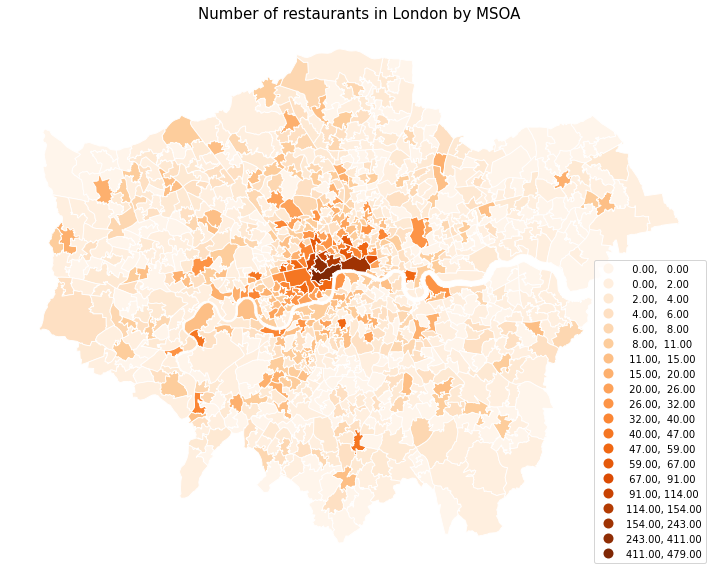

In [77]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of restaurants in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

rest_map.plot(column='Count',
              cmap='Oranges',
              linewidth=0.9,
              ax=ax,
              edgecolor='1',
              scheme='NaturalBreaks', 
              k=20,
              legend=True,
              legend_kwds={'loc': 'lower right'})

In [2]:
#num_rest.to_csv("final_data/restaurants_final.csv")